# Nubes de puntos y Mapas de Calor en Matplotlib

In [2]:
# Liberias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
df = pd.read_csv("C:/Users/G/OneDrive/Documentos/dataset/base_datos_2008.csv")

# Eliminamos los datos faltantes de las columnas que vamos a graficar
df.dropna(inplace=True, subset = ['ArrDelay', 'DepDelay', 'Distance', 'AirTime'])

# Ajustamos el tamaño del grafico
sns.set(rc = {'figure.figsize':(15,10)})

C:\Users\G\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


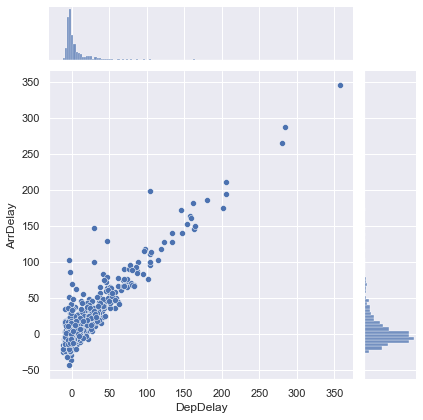

In [3]:
# Creamos un subset de datos donde solo ocuparemos una parte del original
df2 = df[df['Origin'].isin(['ATL', 'HOU', 'IND'])].sample(frac = 1).head(1000)

# Graficamos con los datos de DepDelay y ArrDelay en una misma
sns.jointplot(df2['DepDelay'], df2['ArrDelay'])

In [4]:
# Creamos otro subset para graficos mas avanzados
df3 = df2[np.abs(df2['DepDelay']) < 40]
df3 = df3[np.abs(df3['ArrDelay']) < 40]

C:\Users\G\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


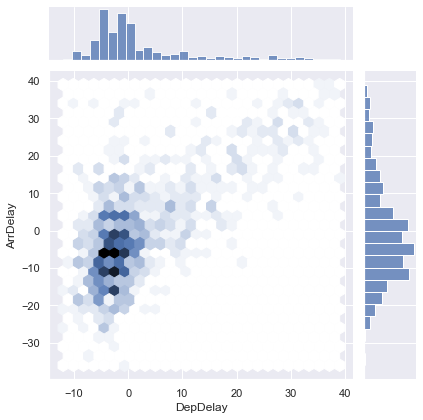

In [5]:
# Distribucion univariada de cada una de las variables y una distribucion conjunta representada con hexagonos
sns.jointplot(df3['DepDelay'], df3['ArrDelay'], kind='hex')

C:\Users\G\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


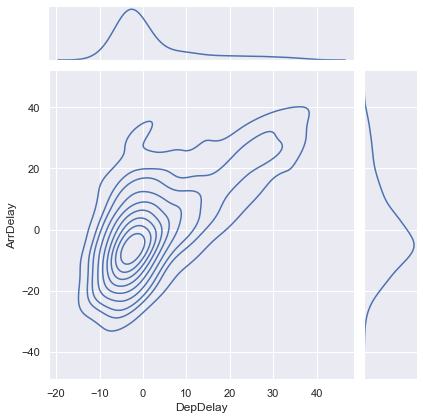

In [6]:
# Grafico de densidad con curvas de nivel
sns.jointplot(df3['DepDelay'], df3['ArrDelay'], kind = 'kde')

In [7]:
# Datos para el grafico de calor
gb_df = pd.DataFrame(df2.groupby(['Origin', 'Month'], as_index = False)['DepDelay'].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,12.773585
1,ATL,2,11.847222
2,ATL,3,10.071429
3,ATL,4,9.176471
4,ATL,5,8.506849


In [8]:
data= gb_df.pivot('Month', 'Origin', 'DepDelay')
data

Origin,ATL,HOU,IND
Month,,,
1,12.773585,10.888889,14.000000
2,11.847222,25.714286,6.200000
3,10.071429,5.700000,-1.000000
4,9.176471,-2.625000,-2.769231
5,8.506849,9.727273,-4.500000
6,16.203390,4.111111,0.250000
7,26.933333,3.812500,0.625000
8,7.491803,1.300000,42.375000
9,7.121212,0.857143,11.200000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

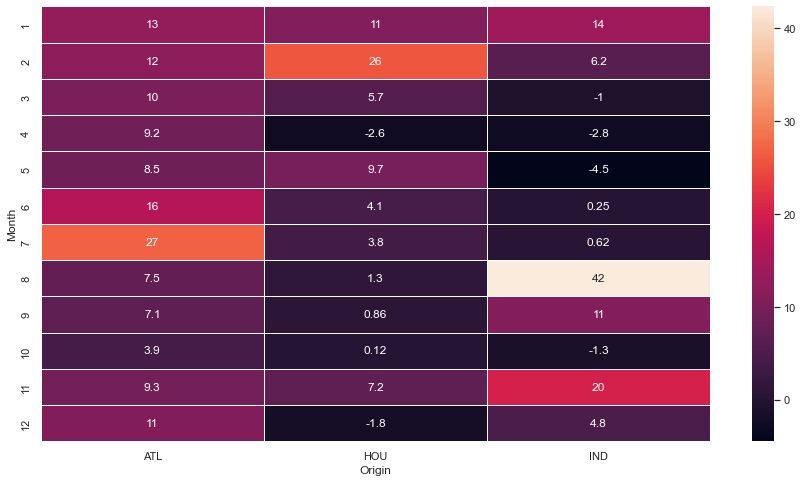

In [9]:
# Grafico de calor

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data, annot = True, linewidths=.5)